In [2]:
# run this code cell using shift+enter before moving further.   You will be writing the algorithm from scratch, but these standard packages will make your work cleaner and faster. 

import numpy as np # library which more efficiently allows you to work with large multidimensional arrays and matrices.  It has functions that operate on the arrays/matrices
import pandas as pd # built on numpy.  Makes it easier to read in data and clean data among other things

from sklearn.datasets import fetch_california_housing # We will be using one of SKlearn's datasets

from sklearn.preprocessing import StandardScaler # Scaling is suggested when running a gradient descent algorithm

import matplotlib # a plotting library
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# TODO Q06
def compute_cost(X_1, y, w, N):
    # Write your code in place of ellipsis. Cost can be calculated using a single line of code.
    # Remember w is a vector here.
    cost= 1/(2 * N) * np.sum((np.dot(X_1, w) - y) ** 2)
    return cost

In [4]:
# TODO Q07
def gradient_descent(X_1 , y, learning_rate, w, n, num_iters):
    # In place of ellipsis, write the updated value of w0 in temp0 and of w1 in temp1
    # Finish the gradient descent function
    
    history = []
    
    for i in range(num_iters):
        # derivative vector is given by : X_train.Transpose *  (( X_train * w)- y ) 
        # You may add your own variables
        
        w = w - (learning_rate / n) * np.dot(X_1.T, (np.dot(X_1, w) - y))

        if(i%100==0):
            # In place of ellipsis, call the cost you just coded above            
            cost = compute_cost(X_1, y, w, n)

            # ! You can uncomment print statements below to see how cost changes, 
            # ! but please make sure you put prints in comments before submission
            # if i == 9900:
            #     print("Final Cost", cost)
        history.append(w)
        
    w0_values = [h[0] for h in history]
    w1_values = [h[1] for h in history]
    plt.scatter(w0_values, w1_values)

    # Add labels and title
    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title(f'Gradient Descent Path for alpha = {learning_rate}')
        
            
    return w

In [5]:
# TODO 08
# Complete the function
def multiple_linear_reg_model_gda(X_1 , y , n , learning_rate , num_iters):

    #initialize the values of parameter vector w. It should be a column vector of zeros of dimension(d+1,1)
    w = np.zeros((X_1.shape[1], 1)) # * features + 1 bias

    #calculate the initial cost by calling the function you coded above.
    initial_cost= compute_cost(X_1, y, w, n)
    # print("Initial Cost")
    # print(initial_cost)

    #calculate the optimized value of gradients by calling the gradient_descent function coded above 
    w = gradient_descent(X_1 , y, learning_rate, w, n, num_iters)
    
    # Calculate the cost with the optimized value of w0 and w1 by calling the cost function.    
    final_cost = compute_cost(X_1, y, w, n)
    # print("Final Cost")
    # print(final_cost)
    
    return w, initial_cost, final_cost

In [9]:
# make a 2, 2 array with features (1, 2) and (1, 3)
X_1 = np.array([[1, 2], [1, 3]])

# our shape of X_1 = (2, 2)

# print(X_1)

y_2d = np.array([[4], [3]])
# our shape of y_2d = (2, 1)


# print(y_2d)
N = 2
num_iters = 10


In [11]:
# TODO Q10

def predict(x, w_opt):
    # ! Hstack adds to the 2 by 2 matrix
    x_aug = np.hstack((np.ones((1, 1)), x))
    predicted_y = np.dot(x_aug, w_opt)
    
    return predicted_y


In [12]:
# Write the code below
def get_stats(X_1, y_2d, w_vec):
    y_tr_pred = np.dot(X_1, w_vec)
    RSS = np.sum((y_tr_pred - y_2d) ** 2)
    TSS = np.sum((y_2d - np.mean(y_2d)) ** 2)
    R2 = 1 - RSS / TSS
    print("RSS = {0:f}".format(RSS))
    print("TSS = {0:f}".format(TSS))
    print("R^2 = {0:f}".format(R2))

### Q5

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[1]
 [4]
 [3]
 [7]]
Q5
w:  [[0.75000027]
 [2.49999977]
 [3.49999977]] 
initial cost:  9.375 
final cost:  0.03125000000001405


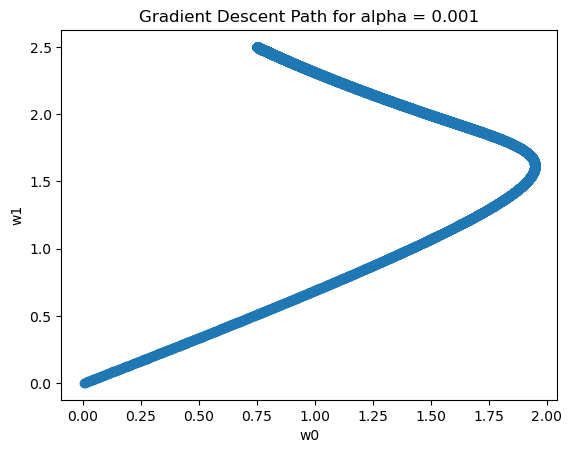

In [44]:
# make a 4, 2 array with features (0, 0), (0, 1), (1, 0), (1, 1)
X_1 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# X_1 = X_1.T
# our shape of X_1 = (2, 4)

N = 4

print(X_1)

scale_func=StandardScaler() # create the scaler object
 
ones = np.ones((N, 1))
X_1 = np.hstack((ones, X_1))

y_2d = np.array([[1], [4], [3], [7]])
# our shape of y_2d = (4, 1)


print(y_2d)

num_iters = 100000
learning_rate = 0.001
results = multiple_linear_reg_model_gda(X_1, y_2d, N, learning_rate, num_iters)

w = results[0]

print(f"Q5")
print("w: ", w, "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])


In [45]:
get_stats(X_1, y_2d, w)

RSS = 0.250000
TSS = 18.750000
R^2 = 0.986667


### Q6

In [13]:
# make a 2, 2 array with features (1, 2) and (1, 3)
X_1 = np.array([[1, 2], [1, 3]])

# our shape of X_1 = (2, 2)

# print(X_1)

y_2d = np.array([[4], [3]])
# our shape of y_2d = (2, 1)


# print(y_2d)
N = 2
num_iters = 10


alpha = 0.06
w:  [[3.]
 [4.]] 
initial cost:  9.375 
final cost:  0.125


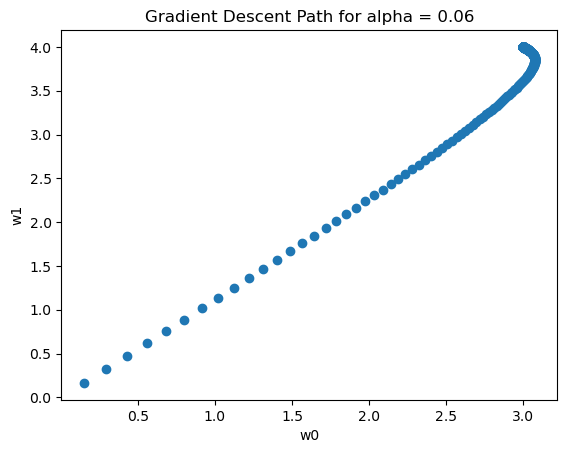

In [34]:
# * 1)
# Call the multiple_linear_reg_model_gda.

print("=========================================")

learning_rate = 0.06
results = multiple_linear_reg_model_gda(X_1, y_2d, N, learning_rate, num_iters)

w = results[0]

print(f"alpha = {learning_rate}")
print("w: ", w, "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])

print("=========================================")



alpha = 0.001
w:  [[0.03390813]
 [0.0821766 ]] 
initial cost:  6.25 
final cost:  5.462308663693527


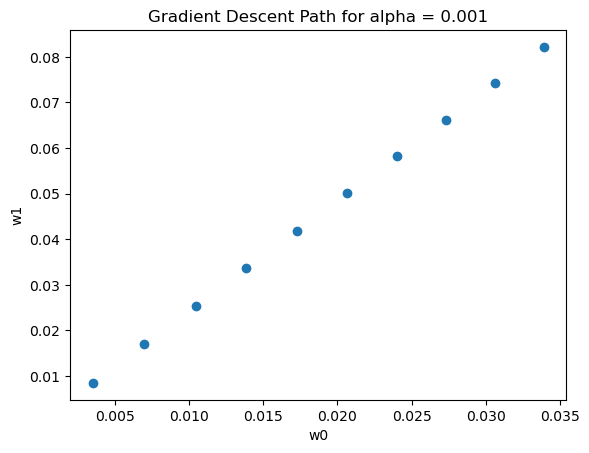

In [18]:
# * 2)
# Call the multiple_linear_reg_model_gda.

print("=========================================")

learning_rate = 0.001
results = multiple_linear_reg_model_gda(X_1, y_2d, N, learning_rate, num_iters)

w = results[0]

print(f"alpha = {learning_rate}")
print("w: ", w, "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])

print("=========================================")

alpha = 0.03
w:  [[0.46425682]
 [1.03566072]] 
initial cost:  6.25 
final cost:  0.6177112481455014


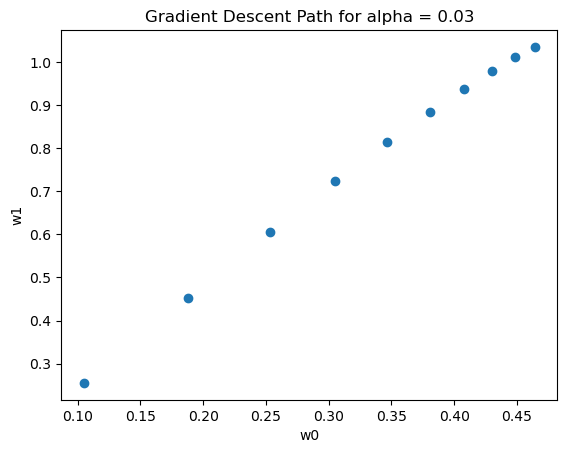

In [19]:
# * 3)
# Call the multiple_linear_reg_model_gda.

print("=========================================")

learning_rate = 0.03
results = multiple_linear_reg_model_gda(X_1, y_2d, N, learning_rate, num_iters)

w = results[0]

print(f"alpha = {learning_rate}")
print("w: ", w, "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])

print("=========================================")